# ***1, Khai báo các thư viện cần sử dụng ***


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


# **2. Kết nối với Google Drive để đọc và lưu dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **3. Khai báo đường dẫn thư mục chứa ảnh dữ liệu**

In [ ]:
!unzip /content/drive/MyDrive/Lung_Cancer/Lung_Cancer_22_2.zip

Archive:  /content/drive/MyDrive/Lung_Cancer/Lung_Cancer_22_2.zip
   creating: Lung_Cancer_22/Lung_Cancer_22/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Test/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Train/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Validation/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Test/Bengin cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Test/Malignant cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Test/Normal cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Train/Bengin cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Train/Malignant cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Train/Normal cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Validation/Bengin cases/
   creating: Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Validation/Malignant cases/
   creating: Lung_Cancer_22/

In [ ]:
import os
train_image_files_path = "/content/Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Train"
valid_image_files_path = "/content/Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Validation"
test_image_files_path = "/content/Lung_Cancer_22/Lung_Cancer_22/Lung_Cancer/Test"

# **4. Gán nhãn dữ liệu**

In [ ]:
label=['Begin_Case','Malignant_Cases','Normal_Case']

In [ ]:
#label = ['\033[1mBengin_Case\033[0m', '\033[1mMalignant Cases\033[0m', '\033[1mNormal_Case\033[0m']

# **5. Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

# **6. Đọc dữ liệu train và validation**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(200, 200),
    class_mode='categorical')

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),
    class_mode='categorical')
test_generator = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size=(200, 200),
    class_mode='categorical')

Found 1293 images belonging to 3 classes.
Found 906 images belonging to 3 classes.
Found 367 images belonging to 3 classes.


# **7. Xây dựng mô hình**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))



# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(3, activation=tf.nn.softmax)) # 3 đầu ra


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

# **8. Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

# **9. Huấn luyện mô hình**

In [ ]:
EPOCHS=50
history=model.fit(train_generator,steps_per_epoch=3,epochs=EPOCHS,verbose=1,validation_data = validation_generator,validation_steps=3)

Epoch 1/50
3/3 [==============================] - 14s 1s/step - loss: 6.6050 - acc: 0.4062 - val_loss: 1.7001 - val_acc: 0.3229
Epoch 2/50
3/3 [==============================] - 2s 887ms/step - loss: 1.4395 - acc: 0.3542 - val_loss: 1.0776 - val_acc: 0.3646
Epoch 3/50
3/3 [==============================] - 2s 732ms/step - loss: 1.0819 - acc: 0.3958 - val_loss: 1.0843 - val_acc: 0.3750
Epoch 4/50
3/3 [==============================] - 2s 716ms/step - loss: 1.1009 - acc: 0.4167 - val_loss: 1.0110 - val_acc: 0.5625
Epoch 5/50
3/3 [==============================] - 2s 880ms/step - loss: 1.0594 - acc: 0.4062 - val_loss: 1.0065 - val_acc: 0.4688
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 0.9837 - acc: 0.5833 - val_loss: 0.8802 - val_acc: 0.6042
Epoch 7/50
3/3 [==============================] - 2s 984ms/step - loss: 0.8992 - acc: 0.6234 - val_loss: 0.8340 - val_acc: 0.5833
Epoch 8/50
3/3 [==============================] - 3s 1s/step - loss: 0.8721 - acc: 0.6234 - val


**10.Đánh Giá Mô Hình**


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


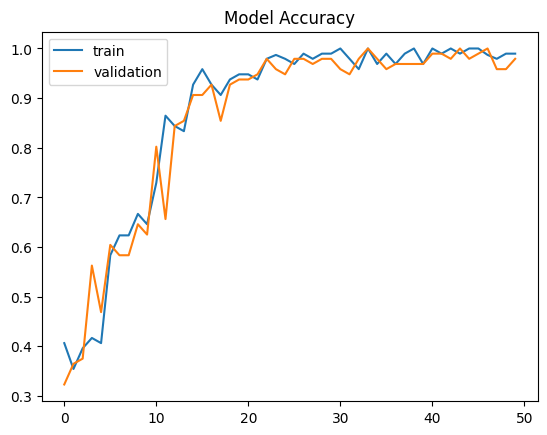

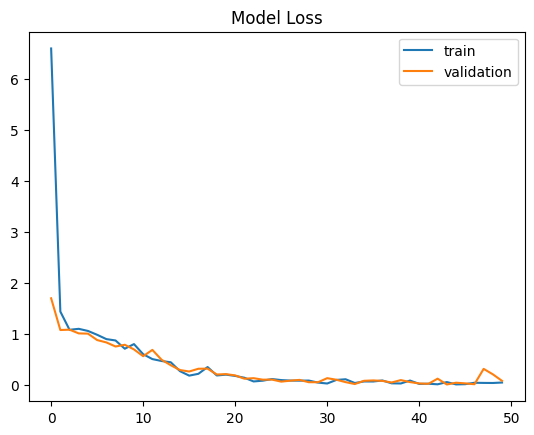

In [ ]:
plt.title('Model Accuracy')
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình trên tập huấn luyện và tập validation
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

print("Train Accuracy:", train_acc)
print("Train Loss:", train_loss)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

29/29 [==============================] - 8s 261ms/step - loss: 0.0853 - acc: 0.9724
Train Accuracy: 0.9767981171607971
Train Loss: 0.06918220967054367
Validation Accuracy: 0.9724062085151672
Validation Loss: 0.08532246947288513


**Sử Dụng Hàm Classification_report để đánh giá mô hình**

In [ ]:
from sklearn.metrics import classification_report
def evaluate_model(model, test_generator):
    # Tạo các dự đoán trên tập kiểm tra
    y_pred = model.predict_generator(test_generator)
    y_pred = np.argmax(y_pred, axis=1)
    # Lấy các nhãn thực tế của tập kiểm tra
    y_true = test_generator.classes
    # Tính toán các metric
    report = classification_report(y_true, y_pred)
    print(report)

In [ ]:
evaluate_model(model,test_generator)

<ipython-input-15-c5c4214185be>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.20      0.20      0.20        50
           1       0.54      0.53      0.54       206
           2       0.30      0.30      0.30       111

    accuracy                           0.42       367
   macro avg       0.34      0.34      0.34       367
weighted avg       0.42      0.42      0.42       367



29/29 [==============================] - 12s 425ms/step


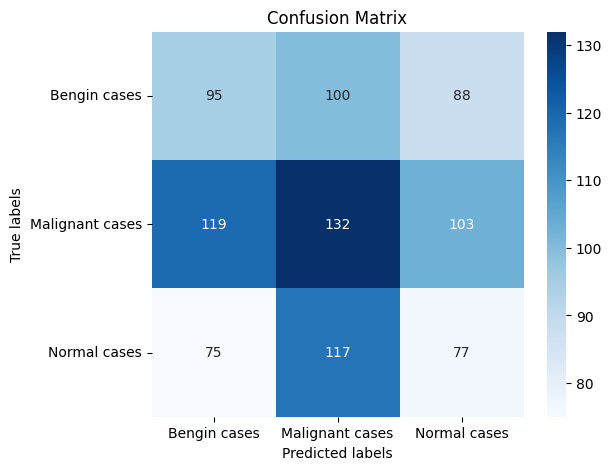

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_generator):
    # Tạo các dự đoán trên tập kiểm tra

    y_pred = model.predict(test_generator)
    y_pred = np.argmax(y_pred, axis=1)

    # Lấy các nhãn thực tế của tập kiểm tra
    y_true = test_generator.classes

    # Tính toán ma trận
    cm = confusion_matrix(y_true, y_pred)

    # Vẽ đồ thị ma trận
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(test_generator.class_indices.keys())
    ax.yaxis.set_ticklabels(test_generator.class_indices.keys(), rotation=0)
    plt.show()


# Vẽ đồ thị ma trận cho mô hình CNN
plot_confusion_matrix(model,validation_generator)

**11. Sử dụng mô hình**

Saving A(3).jpg to A(3).jpg
Saving A(4).jpg to A(4).jpg
Saving A(5).jpg to A(5).jpg
Saving A(6).jpg to A(6).jpg
Saving A(7).jpg to A(7).jpg
Saving A(8).jpg to A(8).jpg


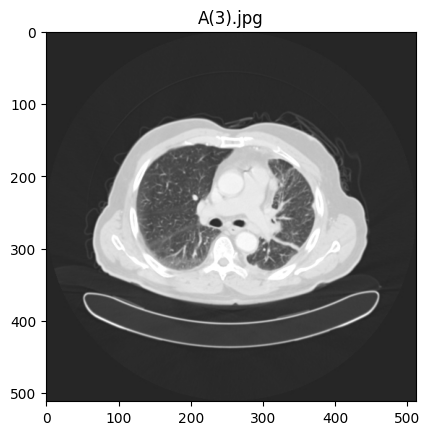

1/1 [==============================] - 0s 200ms/step
Giá trị dự đoán cho ảnh "A(3).jpg":
Malignant_Cases


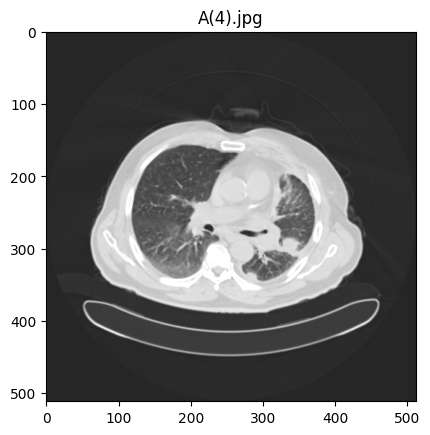

1/1 [==============================] - 0s 21ms/step
Giá trị dự đoán cho ảnh "A(4).jpg":
Malignant_Cases


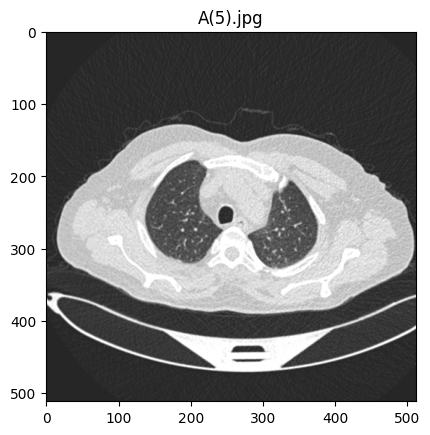

1/1 [==============================] - 0s 21ms/step
Giá trị dự đoán cho ảnh "A(5).jpg":
Normal_Case


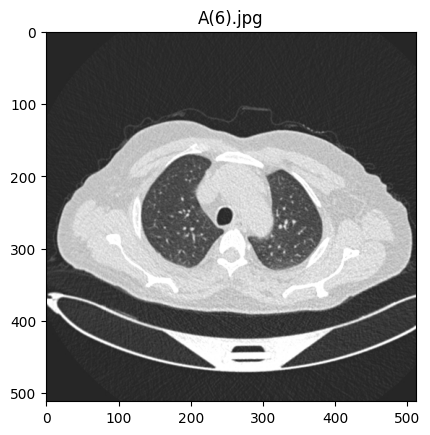

1/1 [==============================] - 0s 19ms/step
Giá trị dự đoán cho ảnh "A(6).jpg":
Normal_Case


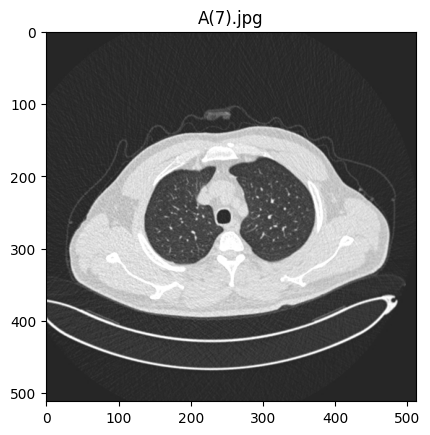

1/1 [==============================] - 0s 21ms/step
Giá trị dự đoán cho ảnh "A(7).jpg":
Begin_Case


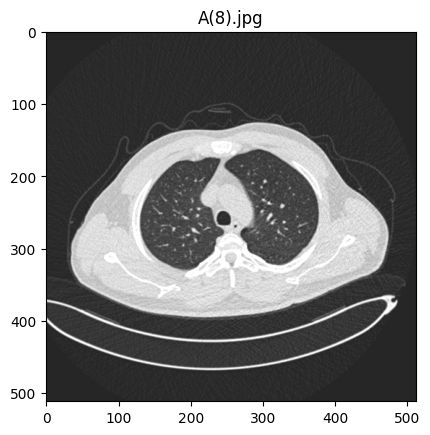

1/1 [==============================] - 0s 20ms/step
Giá trị dự đoán cho ảnh "A(8).jpg":
Begin_Case


In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image
import numpy as np
# create the output directories
uploaded = files.upload()
# show the uploaded images
for fn in uploaded.keys():
  path = '/content/' + fn
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.title(fn)
  plt.show()

  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  y_predict = model.predict(images, batch_size=10)
  print('\033[1m' + 'Giá trị dự đoán cho ảnh "' + fn + '":\n' + '\033[1m' + label[np.argmax(y_predict)])

**12.Lưu Kết Quả Vào Các File Khác Nhau**

In [ ]:
for category in label:
  !mkdir -p /content/{category}
  for fn in uploaded.keys():
    y_predict = model.predict(x)
    predicted_category = label[np.argmax(y_predict)]
    # lưu hình ảnh vào thư mục đầu ra tương ứng
    output_dir = f"/content/{predicted_category}/"
    output_path = output_dir + fn
    plt.imsave(output_path, img)

1/1 [==============================] - 0s 21ms/step


**Lưu Model**

In [ ]:
model.save('my_model.h5')